# Inspecting the Image Data

In [9]:
import os, re
import itertools as it
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
% matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

We can start off by summarizing the contents of the data directory `train_data`.

In [2]:
jpg_path_list = [os.path.join('train_data', path) for path in os.listdir('train_data')]
print("There are %d files in the directory" % len(jpg_path_list))

There are 40481 files in the directory


In [3]:
# print the top 4 file paths
print(", ".join(map(lambda path: path.split('/')[-1], jpg_path_list[:4])))

train_17633.jpg, train_27943.jpg, train_37511.jpg, train_29372.jpg


In [4]:
# check: are there any non-jpg files in the directory?
[file for file in jpg_path_list if not file.endswith('.jpg')]

['train_data/train_v3.csv', 'train_data/train_v2.csv']

Now lets try plotting a sample image:

In [6]:
import matplotlib.image as img
import random

(-0.5, 255.5, 255.5, -0.5)

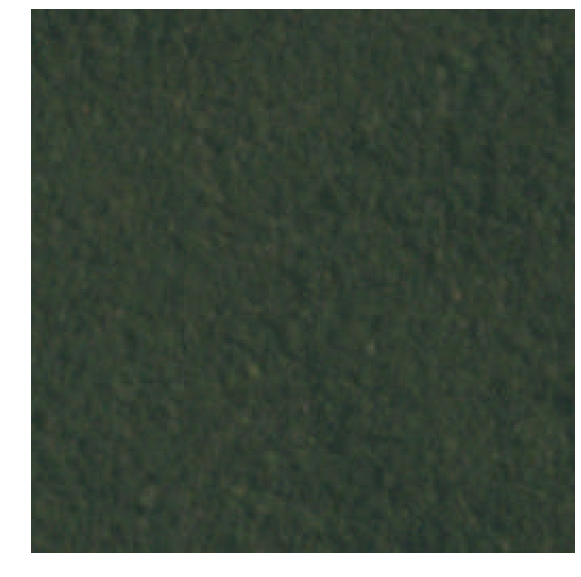

In [7]:
jpg_file = random.choice(jpg_path_list)
jpg_image = img.imread(jpg_file)

plt.imshow(jpg_image)
plt.axis('off')

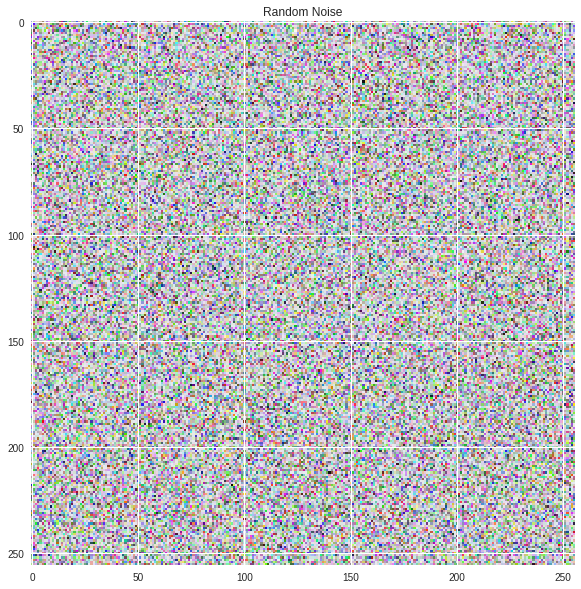

In [13]:
plt.imshow(np.random.randint(0, 255, size=jpg_image.shape).astype(np.float32))
plt.title("Random Noise")

Now lets take a look at the file sizes:

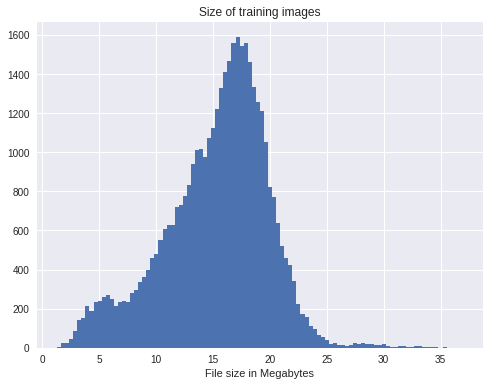

In [13]:
plt.figure(figsize=(8,6))
ax = plt.hist(
         [os.path.getsize(file)/1024 \
              for file in jpg_path_list if file != 'train_data/train_v2.csv'],
         bins=100)
plt.title('Size of training images')
plt.xlabel('File size in Megabytes')
print()   # suppress output

Okay, that's a surprise - it looks like they vary quite a lot. Does this mean that the images are different sizes? We can try checking that now.

In [15]:
jpg_shapes = map(lambda path: img.imread(path).shape, 
                 filter(lambda s: s != 'train_data/train_v2.csv',
                        jpg_path_list))
set(jpg_shapes)

{(256, 256, 4)}

So they are all the same shape. This means that the variation in filesize is simply a function of the compressibility of the image.

Now, lets try plotting a larger sample of the images.

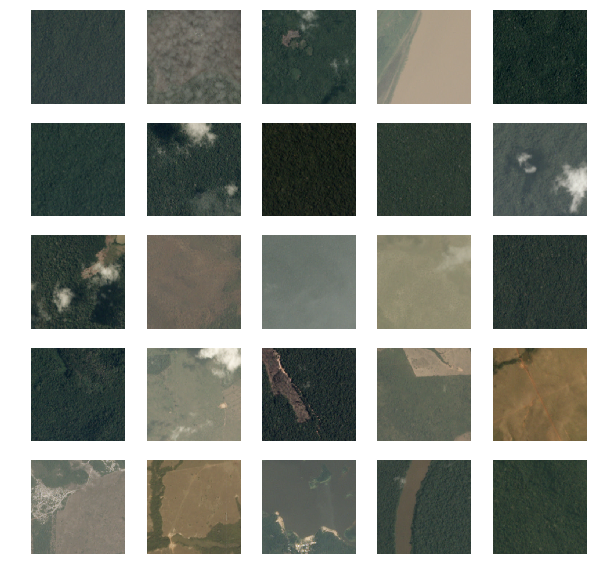

In [19]:
jpg_sample = random.sample(jpg_path_list, 25)
jpg_sample = [img.imread(path) for path in jpg_sample]

fig, ax = plt.subplots(5, 5)
for i, j in it.product(range(5), range(5)):
    image = jpg_sample[5 * i + j]
    ax[i,j].imshow(image)
    ax[i,j].axis('off')